In [8]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [16]:
# 1. Load and prepare dataset
data = load_breast_cancer()
X, y = data.data, data.target

In [18]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
# 3. Train SVM with Linear Kernel
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)
y_pred_linear = svc_linear.predict(X_test)

print("=== Linear Kernel Results ===")
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

=== Linear Kernel Results ===
[[41  2]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [28]:
# 4. Train SVM with RBF Kernel
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)
y_pred_rbf = svc_rbf.predict(X_test)

print("=== RBF Kernel Results ===")
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

=== RBF Kernel Results ===
[[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



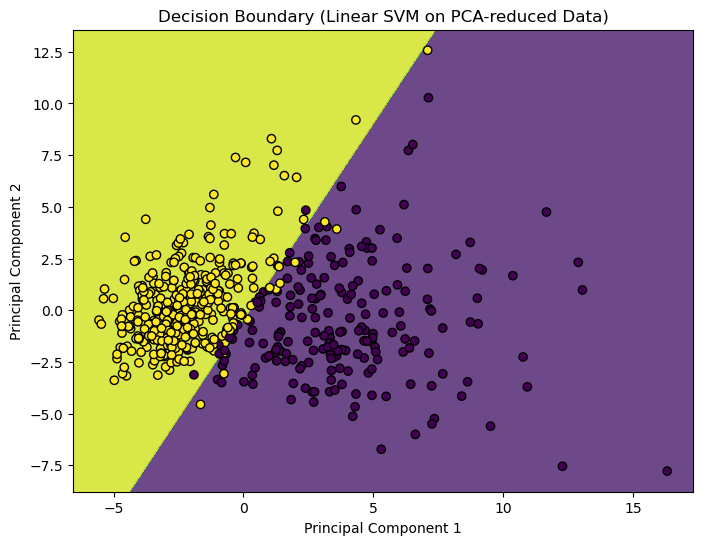

In [30]:
# 5. Visualize decision boundary using PCA (2D projection)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, random_state=42)
svc_vis = SVC(kernel='linear')
svc_vis.fit(X_train_pca, y_train)

def plot_decision_boundary(model, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

plot_decision_boundary(svc_vis, X_pca, y, "Decision Boundary (Linear SVM on PCA-reduced Data)")

In [32]:
# 6. Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0)
grid.fit(X_train, y_train)

print("=== Best Parameters from GridSearch ===")
print(grid.best_params_)

=== Best Parameters from GridSearch ===
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [34]:
# 7. Cross-validation
cv_scores = cross_val_score(grid.best_estimator_, X_scaled, y, cv=5)
print("=== Cross-Validation Scores ===")
print(cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))


=== Cross-Validation Scores ===
[0.97368421 0.95614035 1.         0.96491228 0.97345133]
Mean Accuracy: 0.9736376339077782
